# Assignment 2 - Statistical Treatment for Retail Datasets 
## NYC Property Sales 
### Naila Qisthi Azzahra
### PYTN-KS08-018

### Introduction
Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.
#### Source Data :
https://www.kaggle.com/datasets/new-york-city/nyc-property-sales
- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.
- For further reference on individual fields see the Glossary of Terms. For the building classification codes see the - - - Building Classifications Glossary.

#### Objectives
- Formulate a question and derive a statistical hypothesis test to answer the question
- Make decision using data in scientific mannner

### Import Library
Step pertama adalah melakukan import library yang akan digunakan pada project ini

In [110]:
import math
import statistics
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Data Preprocessing

In [2]:
df_sales = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
#menampilkan 5 baris data teratas
df_sales.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#melihat 5 baris data terbawah
df_sales.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
#size of data frame (rows, columns)
df_sales.shape

(84548, 22)

In [6]:
df_sales.drop(columns = ['Unnamed: 0', 'EASE-MENT'], inplace=True)

In [7]:
#melihat informasi dasar dari kerangka data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

#### Convert Tipe Data
Ada beberapa tipe data yang tidak sesuai, seperti SALE PRICE bertipe object, seharusnya float. Kemudian NEIGHBORHOOD bertipe object, seharusnya categorical.

In [8]:
#identify object columns
print(df_sales.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [9]:
#identify integer columns
print(df_sales.select_dtypes(['int64']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


In [10]:
#object to categorical variabel
obj_cats = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
        'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE']
for colname in obj_cats :
    df_sales[colname]=df_sales[colname].astype('category')

In [11]:
#numeric to categorical variable
num_cats = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
            'TAX CLASS AT TIME OF SALE']
for colname in num_cats:
    df_sales[colname]=df_sales[colname].astype('category')

In [12]:
#object to integer and set error to Nan
numer =  ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']
for col in numer :
    df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce')

In [13]:
#date object
df_sales['SALE DATE'] = pd.to_datetime(df_sales['SALE DATE'])

In [14]:
#cek dataframe
df_sales.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [15]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  category      
 8   APARTMENT NUMBER                84548 non-null  category      
 9   ZIP CODE                        84548 non-null  category      
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

#### Rename Column

In [16]:
df_sales.columns = df_sales.columns.str.replace(' ', '_')

In [17]:
df_sales.columns = df_sales.columns.str.lower()

In [18]:
df_sales.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_square_feet',
       'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'sale_price', 'sale_date'],
      dtype='object')

In [19]:
#membuat kolom baru untuk usia rumah
df_sales['age'] = 2022 - df_sales['year_built']
df_sales

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,122
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,122
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,122
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,109
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,24
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,24
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,97
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,21


In [20]:
#mengubah numerical indicator borough
df_sales['borough'] = df_sales['borough'].astype(str)
df_sales['borough'] = df_sales['borough'].str.replace("1", "Manhattan")
df_sales['borough'] = df_sales['borough'].str.replace("2", "Bronx")
df_sales['borough'] = df_sales['borough'].str.replace("3", "Brooklyn")
df_sales['borough'] = df_sales['borough'].str.replace("4", "Queens")
df_sales['borough'] = df_sales['borough'].str.replace("5", "Staten Island")

In [21]:
#cek missing value
df_sales.isna().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
age                                   0
dtype: int64

In [22]:
#remove missing value
df_sales = df_sales.dropna()

In [23]:
#cek lagi missing value
df_sales.isna().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
dtype: int64

In [24]:
df_sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,48244.0,2.566537e+00,1.746548e+01,0.0,1.0,1.0,2.0,1.844000e+03
commercial_units,48244.0,2.491709e-01,1.098807e+01,0.0,0.0,0.0,0.0,2.261000e+03
total_units,48244.0,2.834632e+00,2.075042e+01,0.0,1.0,1.0,2.0,2.261000e+03
land_square_feet,48244.0,3.358117e+03,3.143590e+04,0.0,1413.0,2140.0,3071.0,4.228300e+06
gross_square_feet,48244.0,3.669753e+03,2.947491e+04,0.0,828.0,1620.0,2520.0,3.750565e+06
year_built,48244.0,1.827765e+03,4.643612e+02,0.0,1920.0,1931.0,1961.0,2.017000e+03
sale_price,48244.0,1.153281e+06,1.340131e+07,0.0,80420.0,480000.0,830000.0,2.210000e+09
age,48244.0,1.942348e+02,4.643612e+02,5.0,61.0,91.0,102.0,2.022000e+03


dari data diatas terlihat bahwa minimum value dari year built = 0, yang mana tidak make sense

In [25]:
#cek data dengan year built = 0
df_sales[df_sales['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,G7,1885 BATHGATE AVENUE,,10457,...,0,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2022
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,V9,1996 WEBSTER AVENUE,,0,...,0,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2022
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,Z9,1816 WEBSTER AVENUE,,10457,...,0,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2022
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,V0,1475 HICKS STREET,,10469,...,0,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2022
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,V0,3552 EASTCHESTER ROAD,,10469,...,0,0,3400.0,0.0,0,1,V0,0.0,2017-03-16,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,C1,112-48 38TH AVENUE,,11368,...,0,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2022
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,Z9,5506 VAN CLEEF STREET,,11368,...,0,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2022
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,D3,142-11 CHERRY AVENUE,,11355,...,0,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2022
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,A3,45-39 BROWVALE LANE,,11362,...,0,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2022


terdapat 2911 baris data dengan year built = 0,

hapus data dengan year built = 0

In [26]:
df_sales = df_sales[df_sales['year_built']!=0]
df_sales

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,122
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,109
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,122
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,102
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,24
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,24
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,97
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,21


jumlah baris data tersisa setelah year built = 0 dihapus adalah 45.333 baris

cek untuk variabel land square feet dan gross square feet apakah ada yang nilainya 0

In [27]:
df_sales[df_sales['land_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 6E",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,87
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH ST, 6B",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,87
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 E 178TH STREET, 2H",,10457,...,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,81
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,R3,2877 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,14
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,R3,2853 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,32
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,32
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,RS,11 TERRACE PLACE,S2,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,16
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,RS,11 TERRACE PLACE,S8,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,16


In [28]:
df_sales[df_sales['gross_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 6E",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,87
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH ST, 6B",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,87
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 E 178TH STREET, 2H",,10457,...,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,81
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,R3,2877 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,14
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,R3,2853 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,32
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,32
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,RS,11 TERRACE PLACE,S2,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,16
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,RS,11 TERRACE PLACE,S8,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,16


Terdapat 8.345 data dengan land square feet 0, dan 8.522 data dengan gross square feet 0, yang mana itu tidak make sense dan perlu dihilangkan

In [29]:
#remove land square feet & gross square feet 0
df_sales = df_sales[df_sales['land_square_feet']!=0]
df_sales = df_sales[df_sales['gross_square_feet']!=0]

df_sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,36805.0,3.182095e+00,1.982145e+01,0.0,1.0,2.0,2.0,1.844000e+03
commercial_units,36805.0,3.231898e-01,1.257908e+01,0.0,0.0,0.0,0.0,2.261000e+03
total_units,36805.0,3.504062e+00,2.360379e+01,0.0,1.0,2.0,2.0,2.261000e+03
land_square_feet,36805.0,4.197334e+03,3.577842e+04,200.0,2000.0,2500.0,3800.0,4.228300e+06
gross_square_feet,36805.0,4.790491e+03,3.363749e+04,60.0,1428.0,2000.0,2898.0,3.750565e+06
year_built,36805.0,1.939078e+03,3.028128e+01,1800.0,1920.0,1930.0,1955.0,2.017000e+03
sale_price,36805.0,1.305841e+06,1.518571e+07,0.0,160000.0,504237.0,840000.0,2.210000e+09
age,36805.0,8.292189e+01,3.028128e+01,5.0,67.0,92.0,102.0,2.220000e+02


Terdapat 36.805 data setelah dilakukan cleaning. Saat diamati kembali, terdapat nilai 0 pada sale price serta nilai yang cukup fantastis untuk maksimum sale_price yaitu mencapai $2 billion dollars. Tentunya ini harga yang sangat tinggi (termasuk outlier) dan perlu dilakukan penanganan

<AxesSubplot:xlabel='age', ylabel='sale_price'>

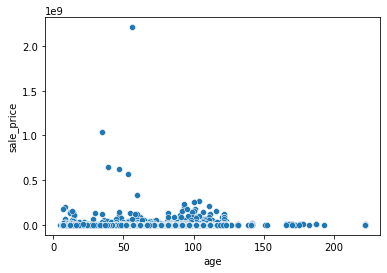

In [30]:
#cek outliers Sale Price melalui scatter plot
sns.scatterplot(data=df_sales, x='age', y='sale_price')

Hapus data outlier pada sale price dengan membuat batasan harga minimum sale price $200.000 dan maksimum sale price $900.000

In [31]:
df_sales = df_sales[(df_sales['sale_price'] >200000) & (df_sales['sale_price'] < 900000)]

<AxesSubplot:xlabel='age', ylabel='sale_price'>

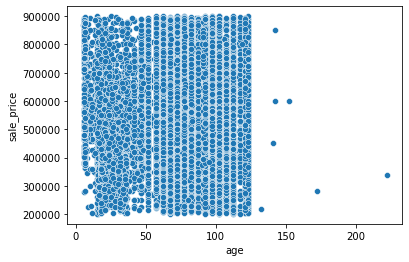

In [32]:
#cek apakah outlier masih ada
sns.scatterplot(data=df_sales, x='age', y='sale_price')

In [33]:
df_sales.describe()

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age
count,18922.000000,18922.000000,18922.000000,1.892200e+04,1.892200e+04,18922.000000,18922.000000,18922.000000
mean,1.772170,0.178681,1.949477,3.566938e+03,2.232457e+03,1944.182010,540264.732058,77.817990
std,14.118981,16.467522,21.784672,3.666580e+04,2.839690e+04,30.100578,173529.329292,30.100578
min,0.000000,0.000000,0.000000,2.000000e+02,1.200000e+02,1800.000000,200600.000000,5.000000
25%,1.000000,0.000000,1.000000,2.000000e+03,1.264000e+03,1920.000000,406354.750000,62.000000
50%,1.000000,0.000000,1.000000,2.500000e+03,1.606000e+03,1935.000000,525000.000000,87.000000
75%,2.000000,0.000000,2.000000,3.750000e+03,2.140000e+03,1960.000000,675000.000000,102.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,899888.000000,222.000000


saat diamati kembali, masih ada data yg bernilai 0 pada total unit, ini perlu dihilangkan

In [34]:
df_sales[df_sales['total_units']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
5603,Manhattan,HARLEM-CENTRAL,37 RELIGIOUS FACILITIES,4,1771,44,M9,170-174 EAST 123 STREET,,10035,...,0,0,5973.0,24626.0,1900,4,M9,330000.0,2017-06-06,122
32125,Brooklyn,BUSHWICK,37 RELIGIOUS FACILITIES,4,3408,5,M1,1595 BROADWAY,,11207,...,0,0,7840.0,9520.0,1910,4,M1,500000.0,2017-05-17,112
37616,Brooklyn,FLATBUSH-CENTRAL,11 SPECIAL CONDO BILLING LOTS,2,5147,7501,R0,1600 BEVERLEY ROAD,,11226,...,0,0,5200.0,30000.0,2007,2,R0,600000.0,2016-09-13,15
37693,Brooklyn,FLATBUSH-CENTRAL,29 COMMERCIAL GARAGES,4,5141,23,G4,571 CONEY ISLAND AVENUE,,11218,...,0,0,9352.0,1782.0,1952,4,G4,500000.0,2017-06-13,70
38538,Brooklyn,FLATBUSH-EAST,37 RELIGIOUS FACILITIES,4,7927,6,M1,5109 FOSTER AVENUE,,11203,...,0,0,4000.0,1185.0,1974,4,M1,360000.0,2016-10-20,48
40372,Brooklyn,GRAVESEND,06 TAX CLASS 1 - OTHER,1,6916,47,G0,168 BAY 49TH STREET,,11214,...,0,0,3160.0,300.0,1930,1,G0,615000.0,2017-03-03,92
41642,Brooklyn,MADISON,37 RELIGIOUS FACILITIES,4,6810,1,M1,2702 QUENTIN ROAD,,11229,...,0,0,16500.0,5490.0,1925,4,M1,745720.0,2017-07-12,97
62059,Queens,GLENDALE,37 RELIGIOUS FACILITIES,4,3718,70,M1,77-11 64TH PLACE,,11385,...,0,0,4000.0,3240.0,1931,4,M1,675000.0,2017-04-24,91
67578,Queens,MIDDLE VILLAGE,29 COMMERCIAL GARAGES,4,3802,2,G1,79-01 COOPER AVENUE,,11385,...,0,0,1450.0,1450.0,1931,4,G1,650000.0,2016-12-15,91
82013,Staten Island,PRINCES BAY,21 OFFICE BUILDINGS,4,6760,49,O1,6054 AMBOY ROAD,,10309,...,0,0,7160.0,1084.0,1931,4,O1,420000.0,2016-09-29,91


In [35]:
df_sales = df_sales[df_sales['total_units']!=0]

df_sales

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
223,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,0,9,1566.0,6330.0,1901,2,C4,416790.0,2017-08-31,121
224,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,0,9,1566.0,6330.0,1901,2,C4,630370.0,2017-08-31,121
277,Manhattan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,C6,309 WEST 20TH STREET,,10011,...,0,24,4600.0,12200.0,1850,2,C6,282000.0,2016-10-19,172
2062,Manhattan,FASHION,23 LOFT BUILDINGS,4,805,39,L1,115-123 W 29TH,,10001,...,15,15,6994.0,79465.0,1913,4,L1,220000.0,2016-12-19,109
2587,Manhattan,FLATIRON,08 RENTALS - ELEVATOR APARTMENTS,2,844,8,D6,9 EAST 16TH STREET,,10003,...,1,16,4600.0,30680.0,1900,2,D6,489854.0,2017-01-27,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,125 DARNELL LANE,,10309,...,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31,27
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,,10309,...,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07,28
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,24
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,24


In [36]:
#cek data duplikat
df_sales.duplicated().sum()

43

In [37]:
#hapus data duplikat
df_sales.drop_duplicates(inplace=True)

In [38]:
df_sales.describe()

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age
count,18869.000000,18869.000000,18869.000000,1.886900e+04,1.886900e+04,18869.000000,18869.000000,18869.000000
mean,1.756426,0.177328,1.932376,3.405357e+03,2.167482e+03,1944.178706,540487.612645,77.821294
std,13.980040,16.490296,21.709866,3.462903e+04,2.814044e+04,30.097502,173453.340483,30.097502
min,0.000000,0.000000,1.000000,2.000000e+02,1.200000e+02,1800.000000,200600.000000,5.000000
25%,1.000000,0.000000,1.000000,2.000000e+03,1.264000e+03,1920.000000,407000.000000,62.000000
50%,1.000000,0.000000,1.000000,2.500000e+03,1.606000e+03,1935.000000,525000.000000,87.000000
75%,2.000000,0.000000,2.000000,3.750000e+03,2.140000e+03,1960.000000,675000.000000,102.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,899888.000000,222.000000


Setelah dilakukan cleaning, tersisa 18.869 data yang akan di explor statistik deskriptif dan inferens nya

In [39]:
df_sales

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
223,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,0,9,1566.0,6330.0,1901,2,C4,416790.0,2017-08-31,121
224,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,0,9,1566.0,6330.0,1901,2,C4,630370.0,2017-08-31,121
277,Manhattan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,C6,309 WEST 20TH STREET,,10011,...,0,24,4600.0,12200.0,1850,2,C6,282000.0,2016-10-19,172
2062,Manhattan,FASHION,23 LOFT BUILDINGS,4,805,39,L1,115-123 W 29TH,,10001,...,15,15,6994.0,79465.0,1913,4,L1,220000.0,2016-12-19,109
2587,Manhattan,FLATIRON,08 RENTALS - ELEVATOR APARTMENTS,2,844,8,D6,9 EAST 16TH STREET,,10003,...,1,16,4600.0,30680.0,1900,2,D6,489854.0,2017-01-27,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,125 DARNELL LANE,,10309,...,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31,27
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,,10309,...,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07,28
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,24
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,24


In [43]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18869 entries, 223 to 84545
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         18869 non-null  object        
 1   neighborhood                    18869 non-null  category      
 2   building_class_category         18869 non-null  category      
 3   tax_class_at_present            18869 non-null  category      
 4   block                           18869 non-null  category      
 5   lot                             18869 non-null  category      
 6   building_class_at_present       18869 non-null  category      
 7   address                         18869 non-null  category      
 8   apartment_number                18869 non-null  category      
 9   zip_code                        18869 non-null  category      
 10  residential_units               18869 non-null  int64         
 11  

### Exploratory Data with Descriptive & Inferential Statistics 

#### Measure of Central Tendency : Mean

Question : Bagaimana perbedaan rata-rata harga rumah, usia rumah, land square feet, serta gross square feet berdasarkan borough / wilayah di New York?

In [41]:
mean_saleprice = df_sales[['borough','sale_price']].groupby('borough').mean().sort_values(by='sale_price', ascending=True)
mean_saleprice

,sale_price
borough,
Bronx,482071.775373
Staten Island,502314.674545
Manhattan,558466.000000
Queens,562867.059785
Brooklyn,581260.988241


Rata-rata harga rumah di Brooklyn paling tinggi dibanding dengan wilayah yang lainnya, serta rata-rata harga rumah di Bronx paling rendah dibanding dengan yang lainnya

In [47]:
mean_age = df_sales[['borough','age']].groupby('borough').mean().sort_values(by='age', ascending=True)
mean_age

,age
borough,
Staten Island,53.932273
Bronx,81.374024
Queens,84.320062
Brooklyn,89.087935
Manhattan,110.428571


Rata-rata usia rumah di Manhattan mencapai angka 100 tahun, sedangkan di state island rata-rata usia rumah sekitar 53 tahun

In [46]:
mean_lsq = df_sales[['borough','land_square_feet']].groupby('borough').mean().sort_values(by='land_square_feet', ascending=True)
mean_lsq

,land_square_feet
borough,
Brooklyn,2629.091002
Bronx,2719.812278
Manhattan,3353.035714
Queens,3644.086240
Staten Island,4116.548864


Rata-rata land square feet Staten island paling tinggi dibandingkan dengan wilayah lain di NYC

In [48]:
mean_gsq = df_sales[['borough','gross_square_feet']].groupby('borough').mean().sort_values(by='gross_square_feet', ascending=True)
mean_gsq

,gross_square_feet
borough,
Staten Island,1818.091136
Brooklyn,2213.603272
Queens,2235.011672
Bronx,2279.212917
Manhattan,20786.142857


Rata-rata gross square feet rumah di Manhattan paling tinggi dibandingkan dengan wilayah lain di NYC

#### Measure of Central Tendency : Median

In [50]:
median_saleprice = df_sales[['borough','sale_price']].groupby('borough').median().sort_values(by='sale_price', ascending=True)
median_saleprice

,sale_price
borough,
Bronx,475000.0
Staten Island,487500.0
Queens,555000.0
Brooklyn,590000.0
Manhattan,599571.0


Wilayah Manhattan memiliki sale price rumah yang paling tinggi dibandingkan dengan yang lainnya

#### Measure of Central Tendency : Modus

In [57]:
mode_age = df_sales[['borough','age']].groupby('borough').apply(pd.DataFrame.mode).sort_values(by='age', ascending=True)
mode_age.reset_index(drop=True)

,borough,age
0,Staten Island,52
1,Bronx,102
2,Brooklyn,102
3,Queens,102
4,Manhattan,122


Wilayah Manhattan didominasi oleh rumah dengan usia 122 tahun, wilayah Bronx Brooklyn dan Queens didominasi oleh rumah berusia 102 tahun serta wilayah Manhattan didominasi oleh rumah dengan usia 52 tahun

#### Measure of Spread : Range

In [59]:
#range harga rumah
rangeprice = df_sales.groupby('borough').apply(lambda x: x['sale_price'].max() - x['sale_price'].min())
rangeprice

borough
Bronx            687500.0
Brooklyn         696500.0
Manhattan        634360.0
Queens           699288.0
Staten Island    697600.0
dtype: float64

Range harga rumah dari setiap wilayah di Newyork tidak jauh berbeda, berada disekitar 600.000 dollar

#### Measure of Spread : Variance

In [60]:
#varians setiap kolom data berdasarkan Borough
var= df_sales.groupby('borough').var()
var

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age
borough,,,,,,,,
Bronx,3.288325,0.100432,3.289470,2.428570e+06,4.058019e+06,912.974717,2.101591e+10,912.974717
Brooklyn,23.296552,0.174891,23.372724,3.045236e+08,5.605074e+07,768.752173,3.126707e+10,768.752173
Manhattan,801.072751,42.735450,790.850529,7.064289e+06,9.340852e+08,712.698413,3.926701e+10,712.698413
Queens,461.107060,663.060323,1133.961647,2.324305e+09,1.842692e+09,466.877573,3.295883e+10,466.877573
Staten Island,1.146715,3.648055,4.686212,7.959033e+08,1.063722e+08,1022.016780,2.377844e+10,1022.016780


Data memiliki distribusi yang cukup besar karena nilai varians nya cukup tinggi

#### Measure of Spread : Standard Deviation

In [62]:
std_dev = df_sales.groupby('borough').std()
std_dev

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age
borough,,,,,,,,
Bronx,1.813374,0.316909,1.813690,1558.386892,2014.452598,30.215471,144968.665887,30.215471
Brooklyn,4.826650,0.418200,4.834534,17450.604952,7486.704176,27.726380,176824.976074,27.726380
Manhattan,28.303229,6.537236,28.122065,2657.873008,30562.807129,26.696412,198159.041105,26.696412
Queens,21.473404,25.749958,33.674347,48211.042367,42926.589003,21.607350,181545.663894,21.607350
Staten Island,1.070848,1.909988,2.164766,28211.757763,10313.691517,31.968997,154202.587249,31.968997


Data memiliki distribusi yang besar, dilihat dari nilai standar deviasinya yang cukup tinggi

#### Probability Distribution

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability')

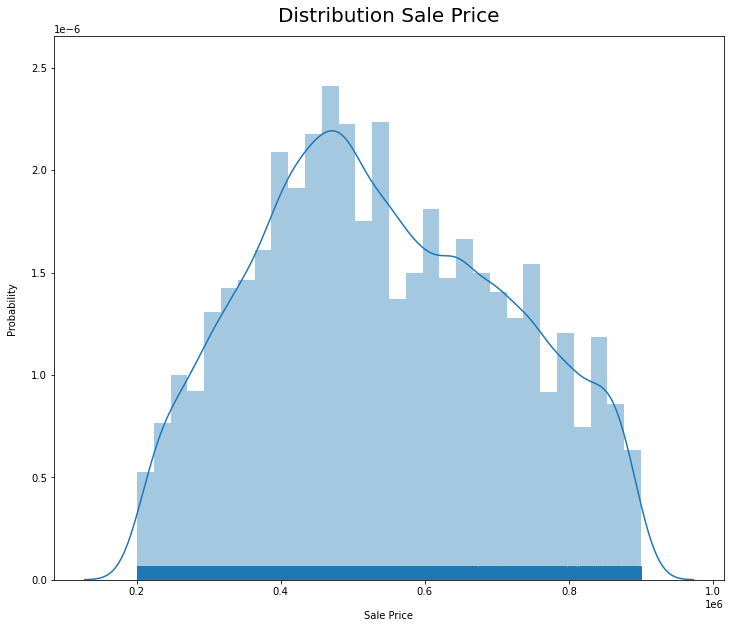

In [87]:
plt.figure(figsize=(12,10))
sns.distplot(df_sales['sale_price'], kde=True, bins=30, rug=True)
plt.title('Distribution Sale Price', y=1.015, fontsize=20)
plt.xlabel('Sale Price', labelpad=14)
plt.ylabel('Probability', labelpad=14)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

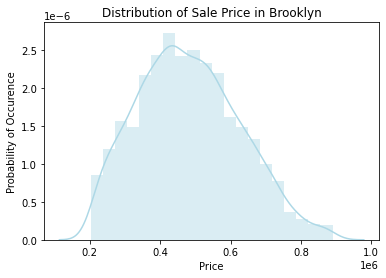

In [86]:
borough = df_sales.groupby("borough")
bronx = borough.get_group('Bronx')
ax = sns.distplot(bronx['sale_price'],
                  kde=True,
                  bins=20,
                  color='lightblue',
                  hist_kws={"linewidth": 15,'alpha':0.45})
ax.set(xlabel='Price', 
       ylabel='Probability', 
       title='Distribution of Sale Price in Bronx')

Distribusi sale price di NYC serta di Bronx cenderung mengikuti bentuk distribusi normal

#### Confidence Interval

In [89]:
CI = df_sales['sale_price']
st.norm.interval(alpha=0.95, loc=np.mean(CI), scale=st.sem(CI))

(538012.7202737816, 542962.505016377)

Rata - rata dari Sale Price yang sebenarnya akan bernilai antara 538012.7202737816 sampai 542962.505016377

#### Hypothesis Testing

Studi Kasus : Apakah rata-rata harga rumah di Manhattan sama dengan rata-rata harga rumah di Brooklyn?
- H0 : µ1 = µ2
- H1 : µ1 ≠ µ2

In [99]:
borough = pd.DataFrame(df_sales[['borough', 'sale_price']])
borough

,borough,sale_price
223,Manhattan,416790.0
224,Manhattan,630370.0
277,Manhattan,282000.0
2062,Manhattan,220000.0
2587,Manhattan,489854.0
...,...,...
84540,Staten Island,509000.0
84541,Staten Island,648000.0
84543,Staten Island,450000.0
84544,Staten Island,550000.0


In [104]:
Manhattan = borough[df_sales['borough'] == 'Manhattan']
Brooklyn = borough[df_sales['borough'] == 'Brooklyn']

In [107]:
n1 = len(Manhattan)
mu1 = Manhattan['sale_price'].mean()

(n1, mu1)

(28, 558466.0)

In [108]:
n2 = len(Brooklyn)
mu2 = Brooklyn['sale_price'].mean()

(n2, mu2)

(3912, 581260.9882413088)

In [112]:
sm.stats.ztest(Manhattan['sale_price'].dropna(), 
              Brooklyn['sale_price'].dropna(),
              alternative='two-sided')

(-0.6791184029493267, 0.49706284293660596)

Kesimpulan : Karena didapat nilai p-value nya > 0.05 yaitu 0.49, maka H0 diterima yaitu rata-rata harga rumah di Manhattan sama dengan rata-rata harga rumah di Brooklyn